In [21]:
# Importazione delle librerie essenziali
import pandas as pd  # Gestione dei dati con DataFrame
import numpy as np

# Librerie per la visualizzazione dei dati
import plotly.graph_objects as go  # Visualizzazioni interattive avanzate
import plotly.subplots as sp  # Creazione di subplots interattivi
import seaborn as sns  # Grafici statistici
import matplotlib.pyplot as plt  # Grafici statici

# Librerie aggiuntive per l'analisi e la formattazione dei dati
import numpy as np  # Operazioni numeriche
import scipy.interpolate as spi  # Interpolazione e smoothing delle curve
import matplotlib.ticker as mtick  # Formattazione degli assi


# Importazione delle librerie necessarie
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Configurazione per visualizzare tutte le colonne nei DataFrame
pd.set_option('display.max_columns', None)

In [22]:
# List of CSV filenames
lista_nomi = ["inf_comunali.csv", "inf_cronologia_edifici.csv", "inf_età.csv", "inf_famiglie.csv",  
              "inf_interni.csv", "inf_numero_di_piani.csv", "inf_parrocchie.csv", "inf_provinciali.csv",  
              "inf_redditi_01.csv", "inf_redditi_02.csv", "inf_redditi_03.csv", "inf_regioni.csv",  
              "inf_scolarizzazione.csv", "inf_scuole.csv", "inf_settori.csv", "inf_stranieri.csv",  
              "informazioni_geografiche.csv", "Errori.csv"]

# Dictionary to hold DataFrames
dfs = {}

# Loop to load each CSV file
for df_name in lista_nomi:
    try:
        # Load the CSV into a DataFrame and clean the name for the dictionary key
        df_key = str(df_name).replace("inf_", "").replace(".csv", "")
        dfs[df_key] = pd.read_csv(f'data cleaning/{df_name}')
    except FileNotFoundError:
        print(f"File {df_name} not found. Skipping.")
    except pd.errors.EmptyDataError:
        print(f"File {df_name} is empty. Skipping.")
    except Exception as e:
        print(f"Error processing {df_name}: {e}")

# Check the dictionary
print(dfs.keys())

File informazioni_geografiche.csv not found. Skipping.
File Errori.csv not found. Skipping.
dict_keys(['comunali', 'cronologia_edifici', 'età', 'famiglie', 'interni', 'numero_di_piani', 'parrocchie', 'provinciali', 'redditi_01', 'redditi_02', 'redditi_03', 'regioni', 'scolarizzazione', 'scuole', 'settori', 'stranieri'])


In [23]:
def grafico_barre(df_plot, colonna_x, colonna_y, titolo, figsize=(12, 7), mostra_media=False, descrizione=None, orientazione='vertical'):
    # Stile di seaborn
    sns.set_style("whitegrid")
    
    # Crea la figura con la dimensione specificata
    plt.figure(figsize=figsize)
    
    # Imposta l'orientazione del grafico
    if orientazione == 'vertical':
        ax = sns.barplot(x=colonna_x, y=colonna_y, data=df_plot, color='#3498db', edgecolor='black')
        plt.xticks(rotation=45, ha='right', fontsize=12)
        for index, value in enumerate(df_plot[colonna_y]):
            ax.text(index, value + 0.5, str(value), ha='center', fontsize=12, fontweight='bold')
        plt.xlabel(colonna_x, fontsize=14)
        plt.ylabel(f'{colonna_y} Media', fontsize=14)
    else:
        ax = sns.barplot(y=colonna_x, x=colonna_y, data=df_plot, color='#3498db', edgecolor='black')
        plt.yticks(fontsize=12)
        for index, value in enumerate(df_plot[colonna_y]):
            ax.text(value + 0.5, index, str(value), va='center', fontsize=12, fontweight='bold')
        plt.ylabel(colonna_x, fontsize=14)
        plt.xlabel(f'{colonna_y} Media', fontsize=14)
    
    # Aggiunge una linea tratteggiata per la media se richiesto
    if mostra_media:
        media_valore = df_plot[colonna_y].mean()
        if orientazione == 'vertical':
            plt.axhline(media_valore, color='red', linestyle='dashed', linewidth=2, label=f'Media: {media_valore:.2f}')
        else:
            plt.axvline(media_valore, color='red', linestyle='dashed', linewidth=2, label=f'Media: {media_valore:.2f}')
        plt.legend(fontsize=12)
    
    # Migliora il design
    plt.title(titolo, fontsize=16, fontweight='bold')
    plt.grid(axis='y' if orientazione == 'vertical' else 'x', linestyle='--', alpha=0.7)
    
    # Aggiunge la descrizione sotto il grafico se presente
    if descrizione:
        plt.figtext(0.5, -0.1, descrizione, wrap=True, horizontalalignment='center', fontsize=10, color='dimgray')
    
    # Mostra il grafico
    plt.show()

## Scuole

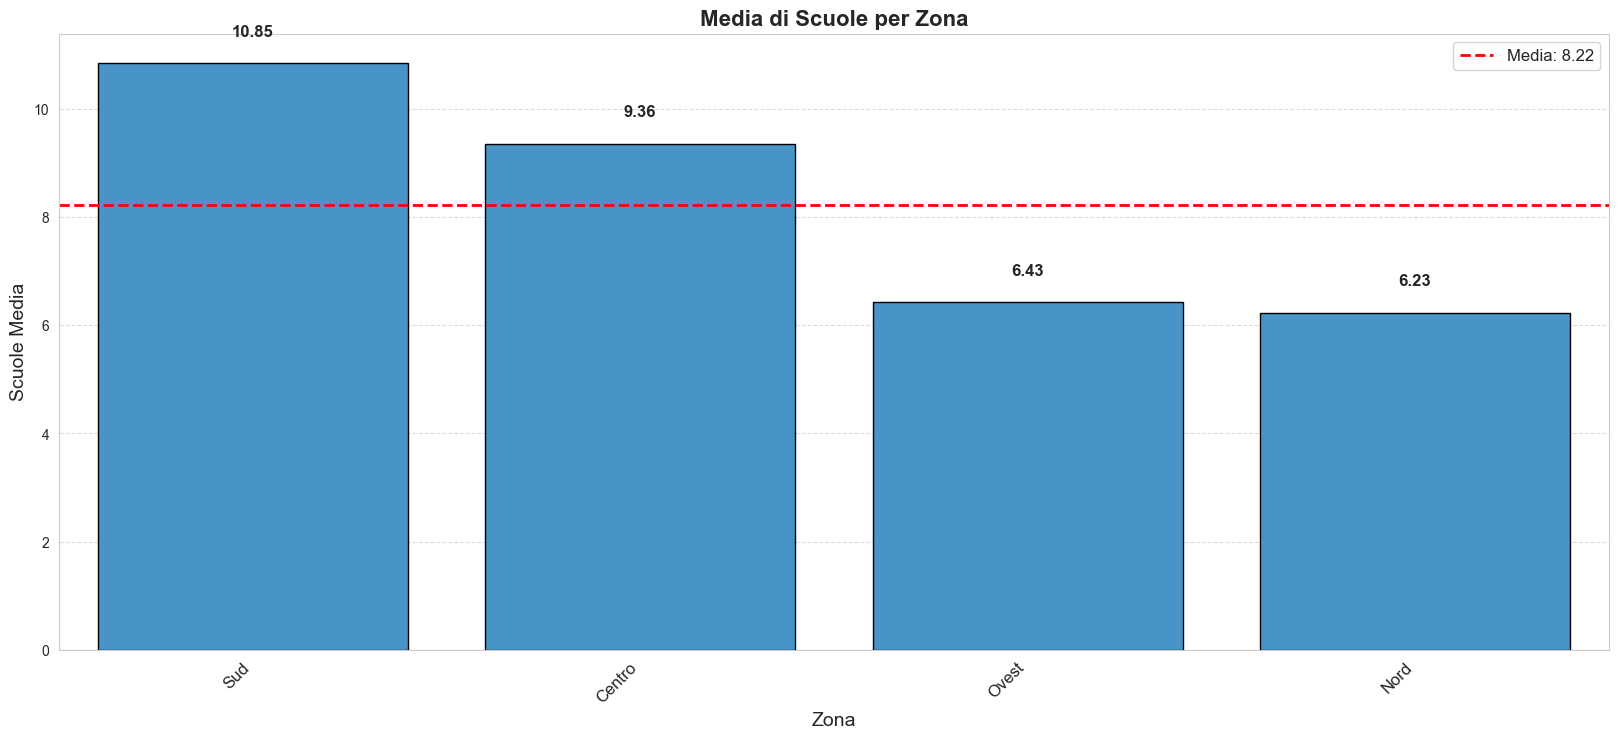

In [24]:
df_plot_scuole = dfs['comunali'][['Comune', 'Provincia', 'Regione', 'Zona', 'Scuole']]
df_plot_scuole = df_plot_scuole[df_plot_scuole['Zona'] != 'Sconosciuto']

df_plot_scuole = (df_plot_scuole.groupby('Zona')['Scuole'].mean().round(2).sort_values(ascending=False).reset_index())
grafico_barre(df_plot_scuole, 'Zona', 'Scuole', 'Media di Scuole per Zona', figsize=(20, 8), mostra_media=True)

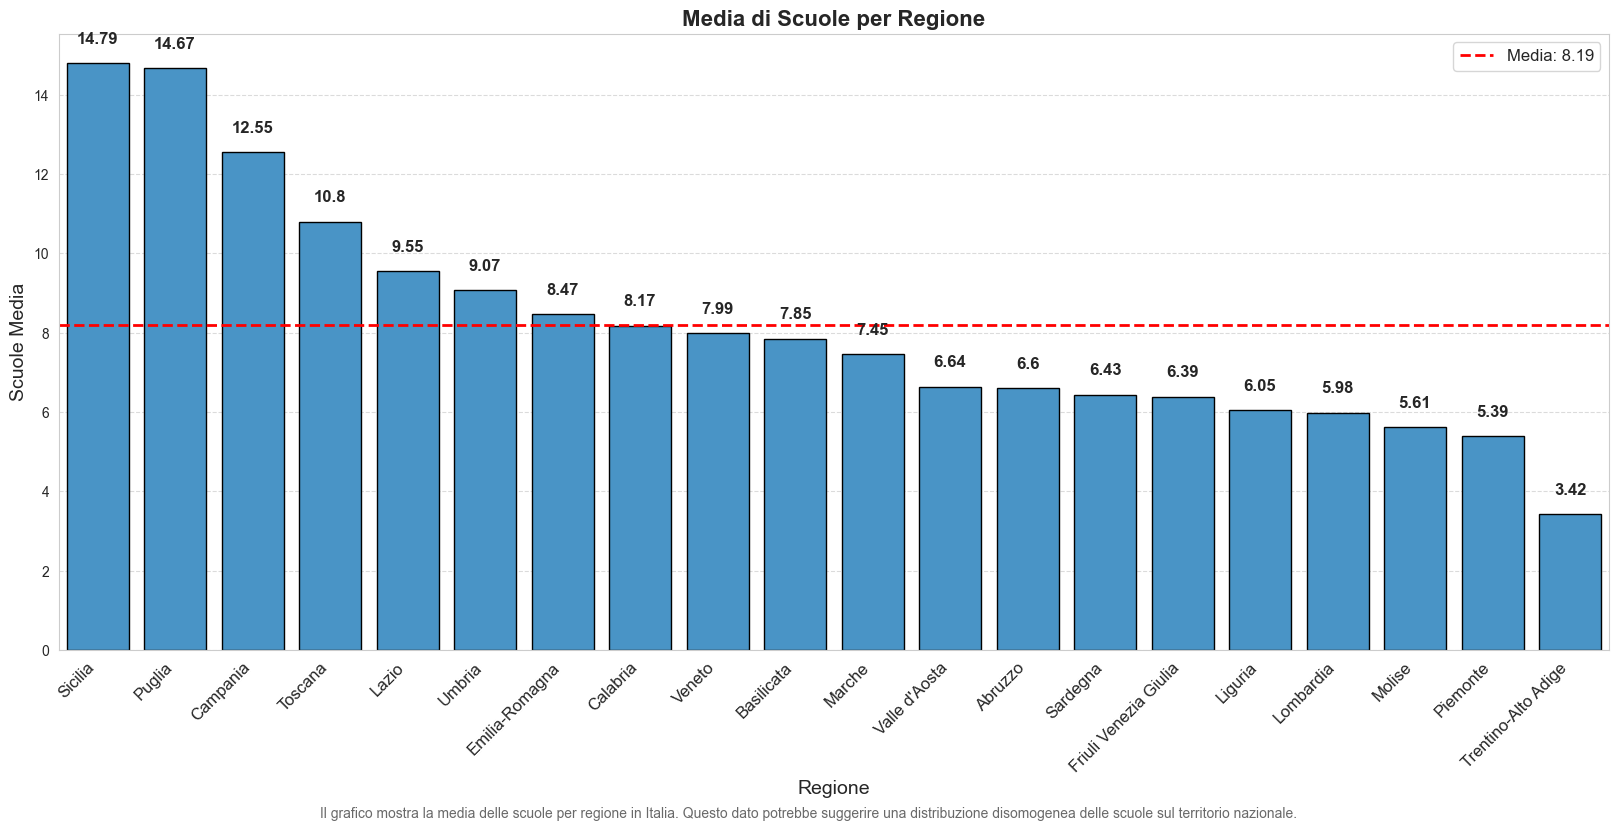

In [25]:
df_plot_scuole = (dfs['comunali'][['Comune', 'Provincia', 'Regione', 'Zona', 'Scuole']]
                        .groupby('Regione')['Scuole'].mean().round(2).sort_values(ascending=False).reset_index())

grafico_barre(df_plot_scuole, 'Regione', 'Scuole', 'Media di Scuole per Regione', figsize=(20, 8), mostra_media=True, 
              descrizione="Il grafico mostra la media delle scuole per regione in Italia. Questo dato potrebbe suggerire una distribuzione disomogenea delle scuole sul territorio nazionale.")

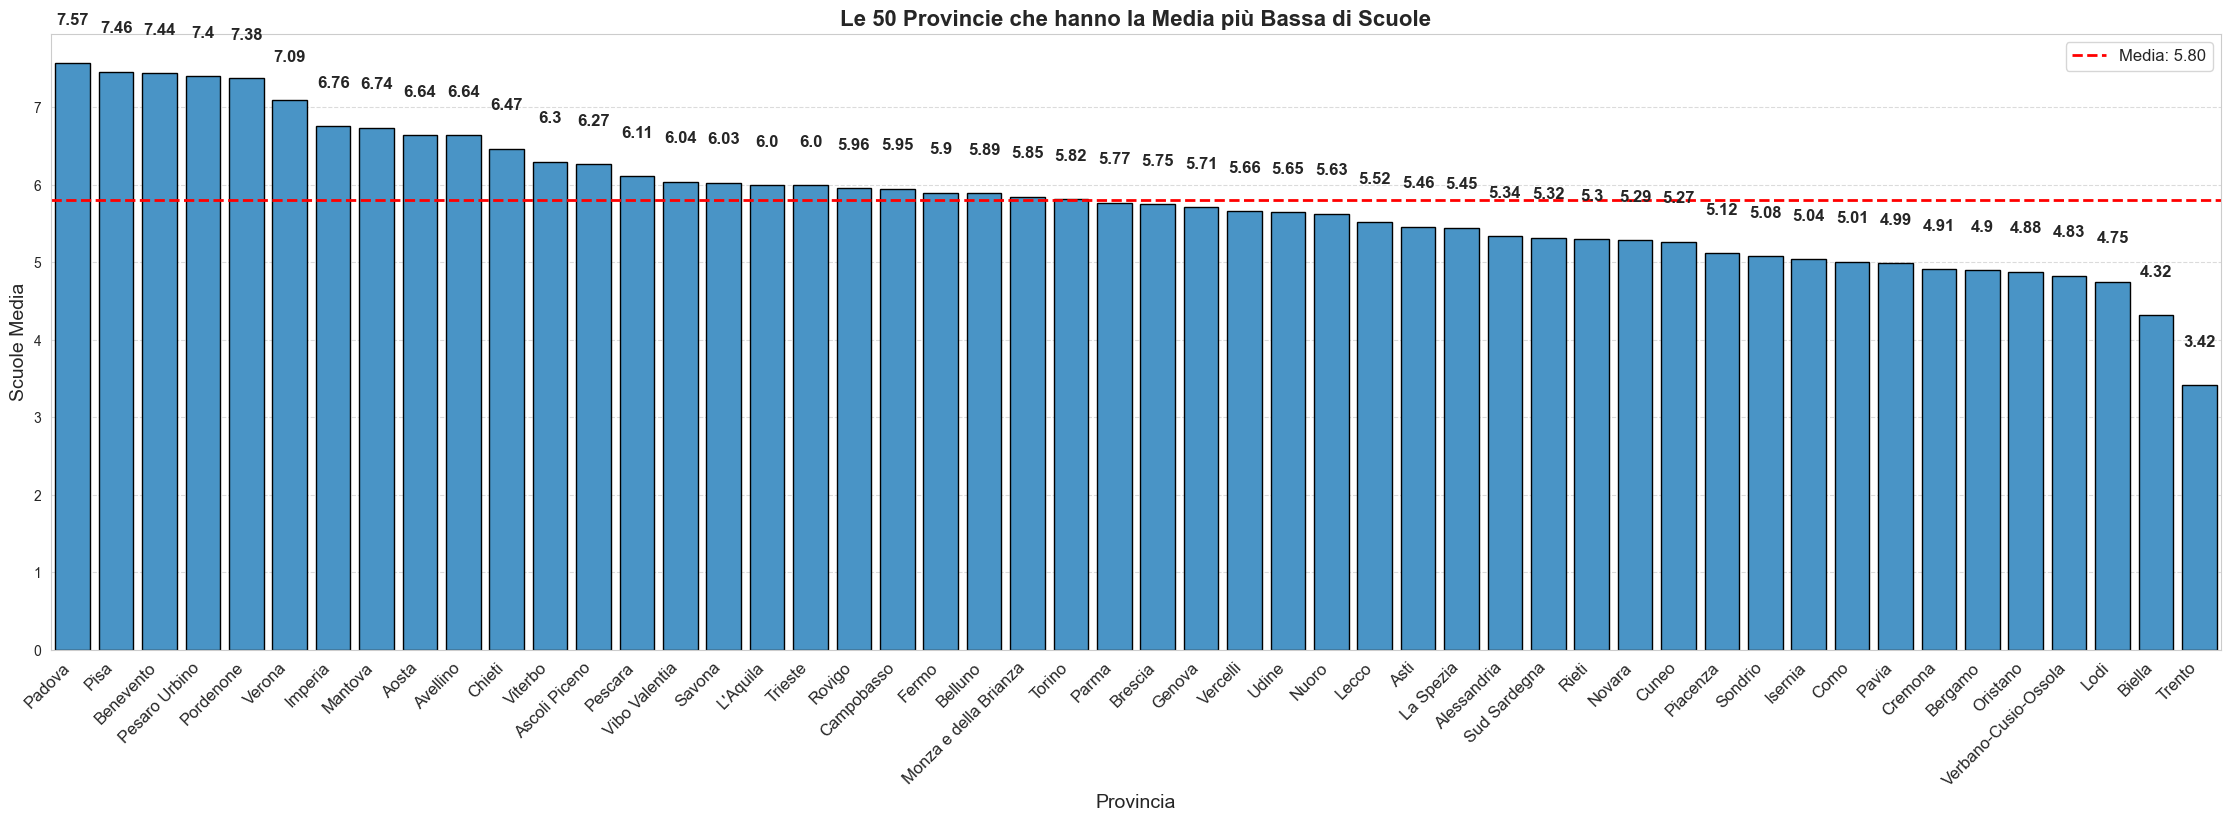

In [26]:
df_plot_provincia = (dfs['comunali'][['Comune', 'Provincia', 'Regione', 'Zona', 'Scuole']]
                        .groupby('Provincia')['Scuole'].mean().round(2).sort_values(ascending=False).reset_index().tail(50))

grafico_barre(df_plot_provincia, 'Provincia', 'Scuole', 'Le 50 Provincie che hanno la Media più Bassa di Scuole', figsize=(28, 8), mostra_media=True)

## Scolarizzazione nei Comuni Italiani

In [27]:
scolarizzazione = dfs['scolarizzazione']
scolarizzazione = scolarizzazione[['Laurea_Totale', 'Diploma_Totale', 'Licenza Media_Totale', 'Licenza Elementare_Totale', 'Alfabeti_Totale', 'Analfabeti_Totale', 'Comune']]

scolarizzazione.head()

,Laurea_Totale,Diploma_Totale,Licenza Media_Totale,Licenza Elementare_Totale,Alfabeti_Totale,Analfabeti_Totale,Comune
0,4890,10581,7561,5009,2327,593,Agrigento
1,7971,19306,18321,11240,3575,577,Alessandria
2,15122,29093,19995,15452,5424,289,Ancona
3,4298,8578,9630,5951,1943,224,Aosta
4,10800,24174,18871,13556,4693,302,Arezzo


In [28]:
scolarizzazione = pd.merge(dfs['comunali'][['Comune', 'Provincia', 'Regione', 'Zona']], scolarizzazione, on='Comune')
scolarizzazione.head()

,Comune,Provincia,Regione,Zona,Laurea_Totale,Diploma_Totale,Licenza Media_Totale,Licenza Elementare_Totale,Alfabeti_Totale,Analfabeti_Totale
0,Agrigento,Agrigento,Sicilia,Sud,4890,10581,7561,5009,2327,593
1,Alessandria,Alessandria,Piemonte,Nord,7971,19306,18321,11240,3575,577
2,Ancona,Ancona,Marche,Centro,15122,29093,19995,15452,5424,289
3,Aosta,Aosta,Valle d'Aosta,Sconosciuto,4298,8578,9630,5951,1943,224
4,Arezzo,Arezzo,Toscana,Centro,10800,24174,18871,13556,4693,302


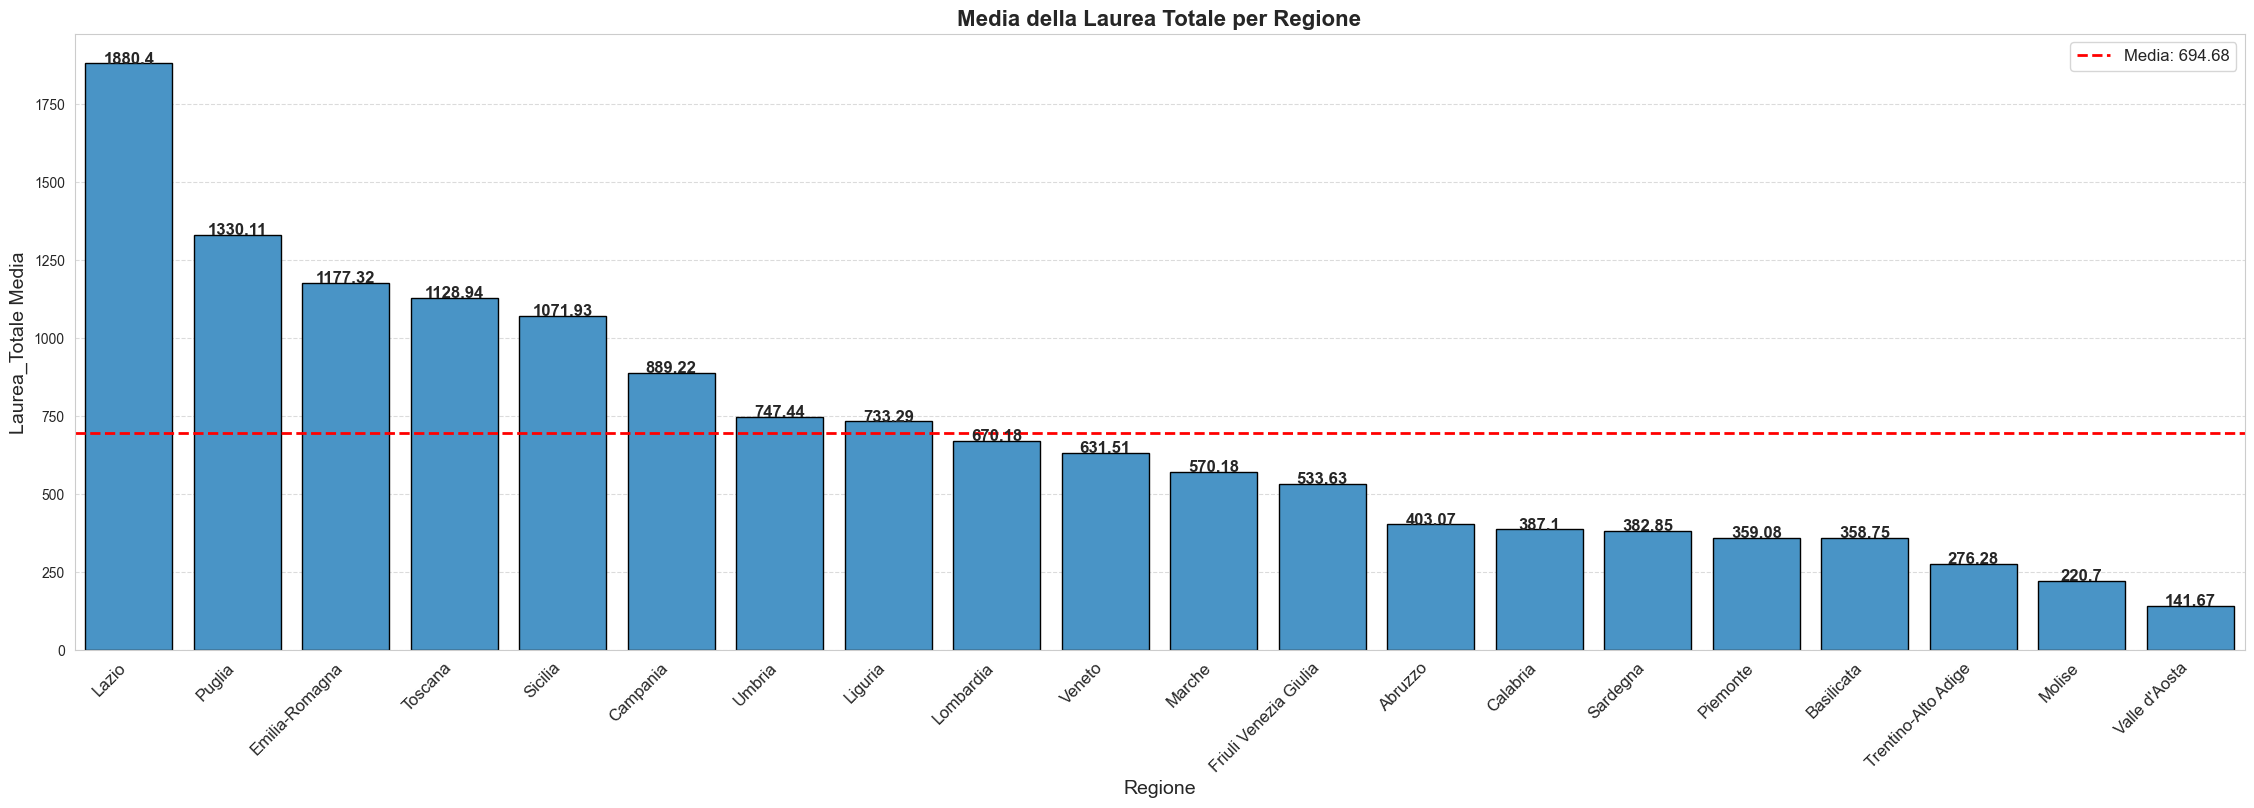

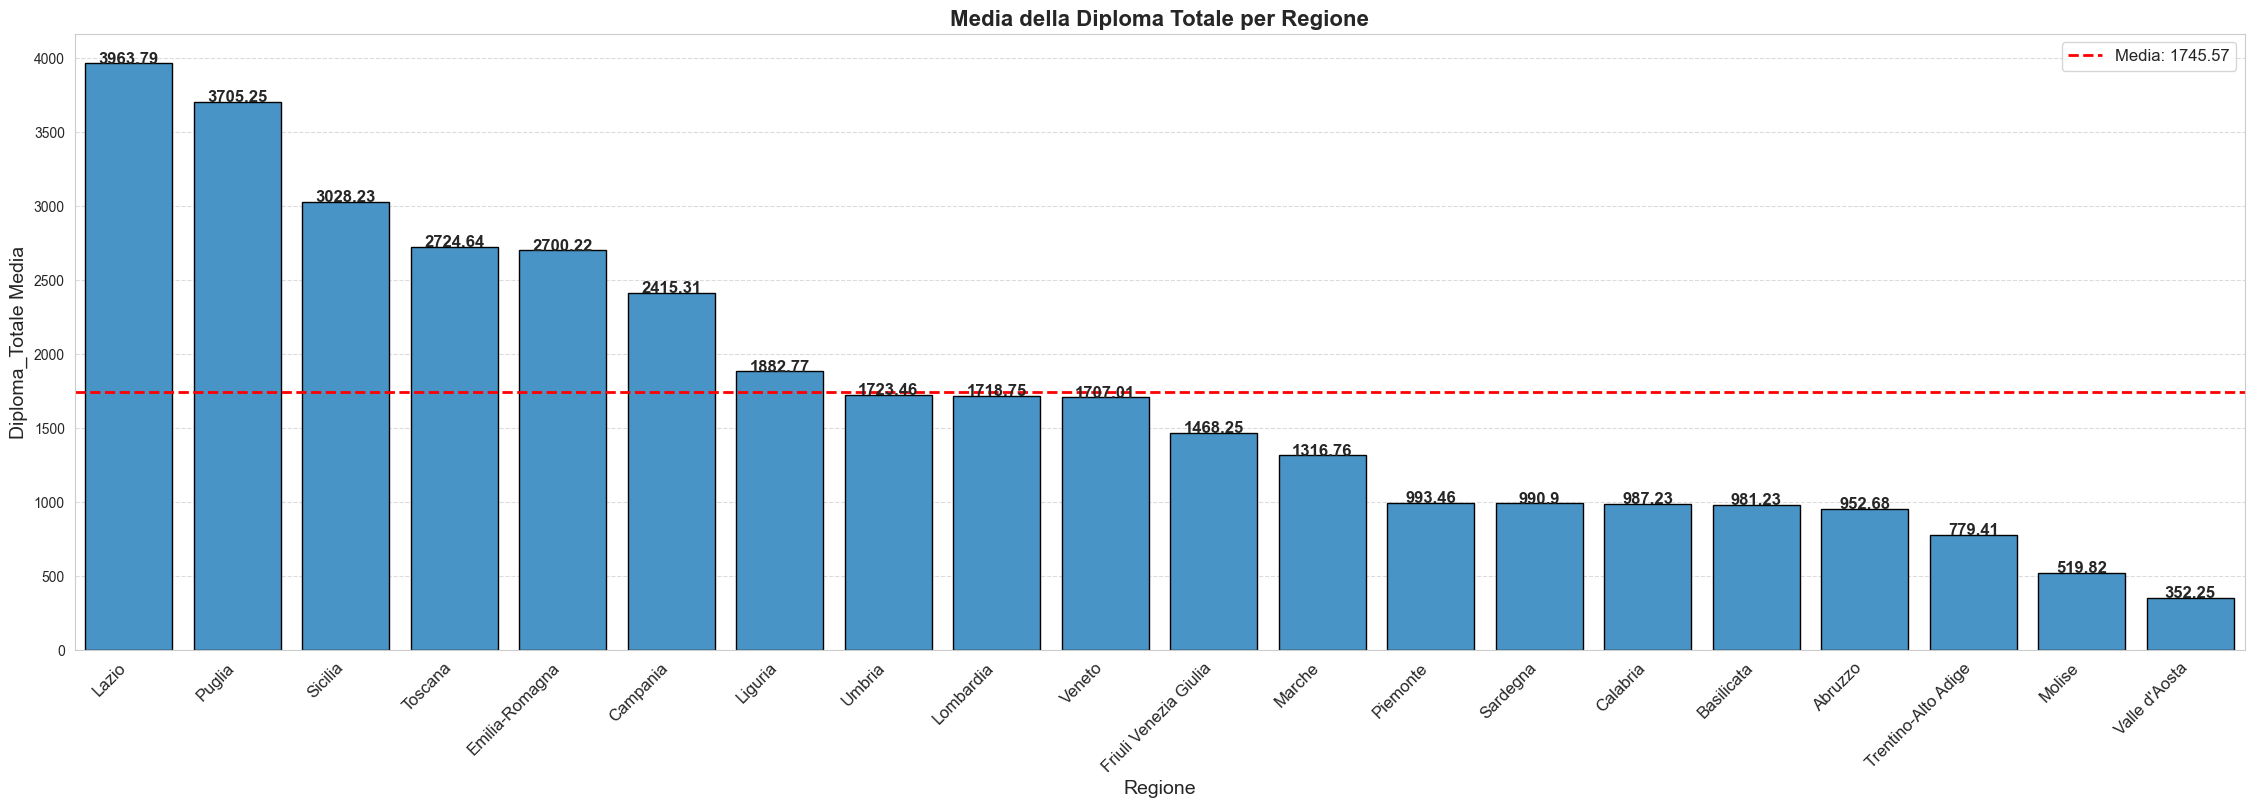

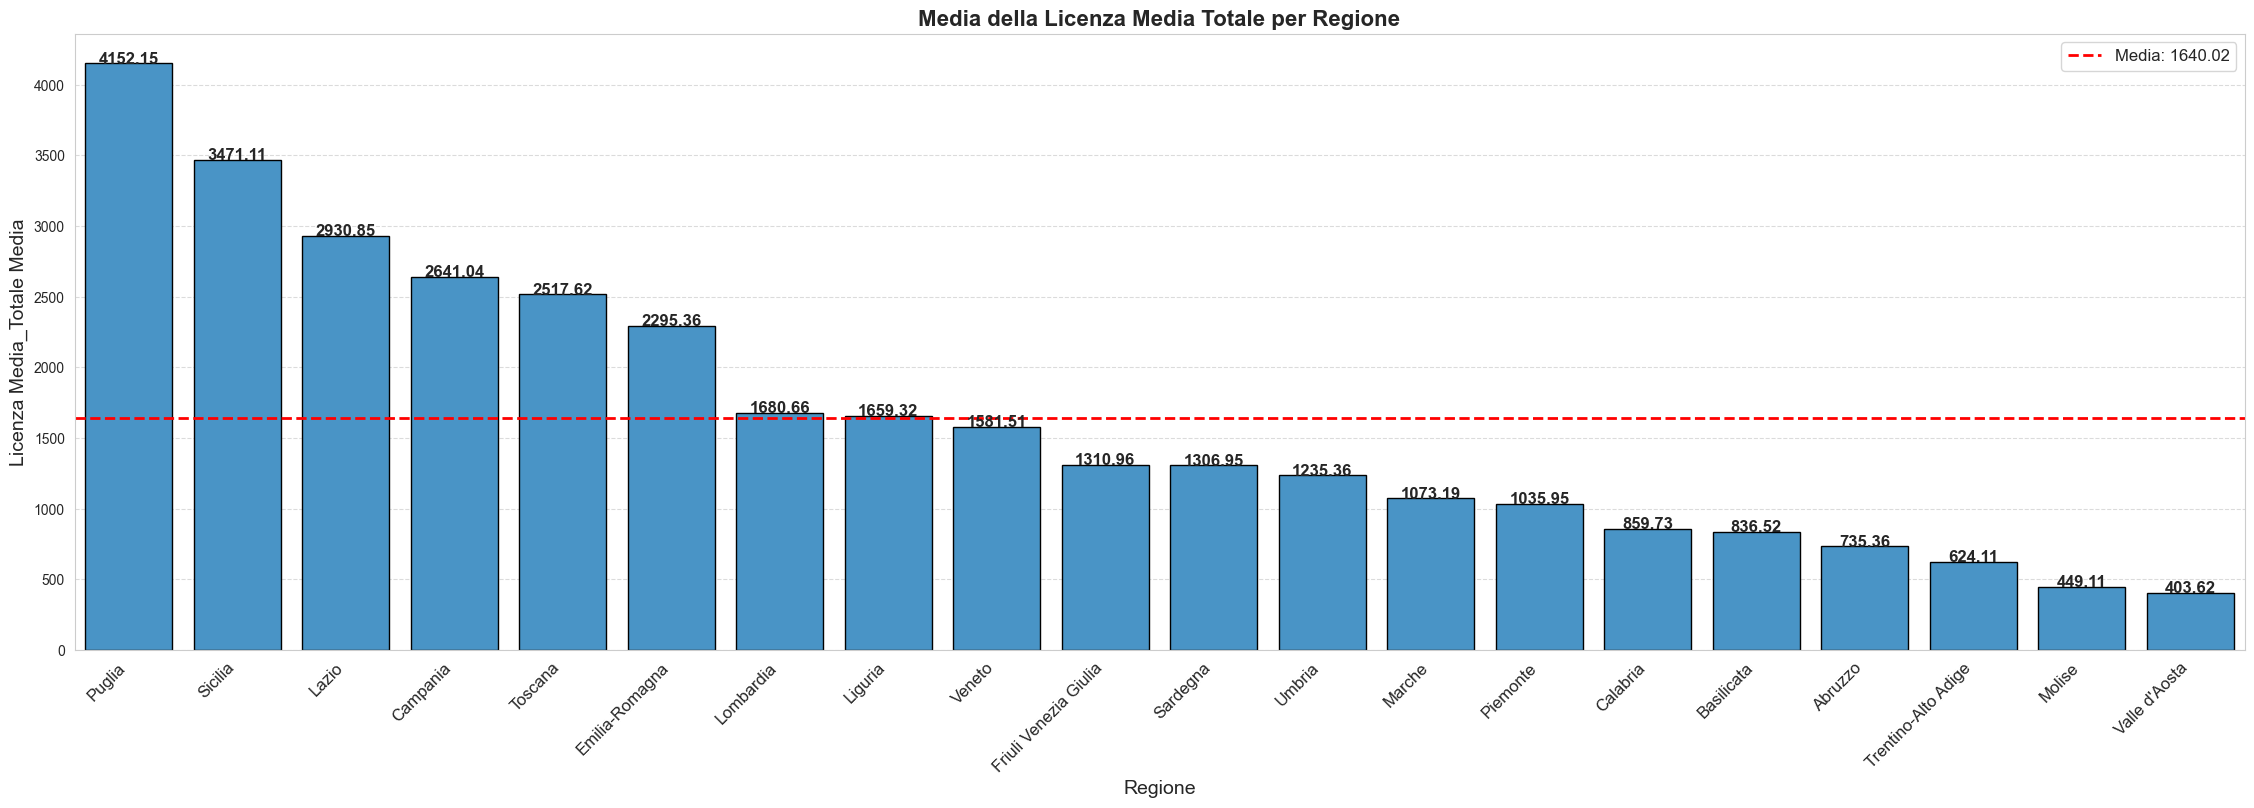

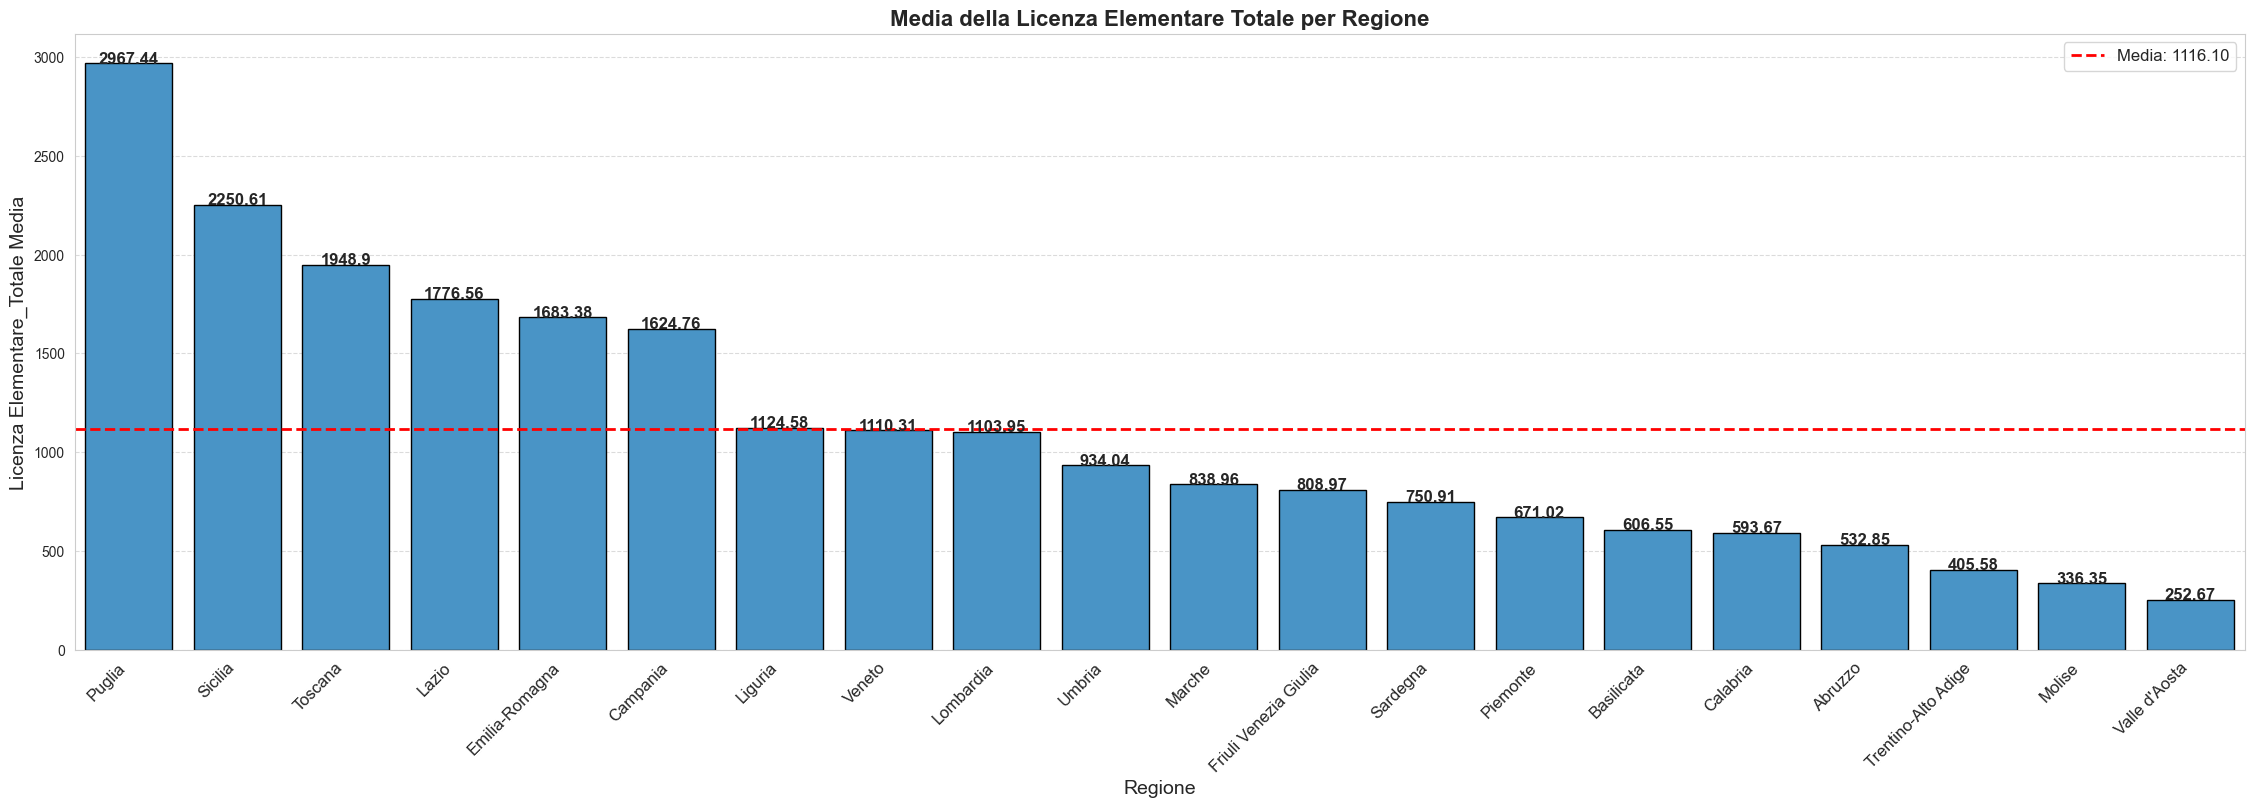

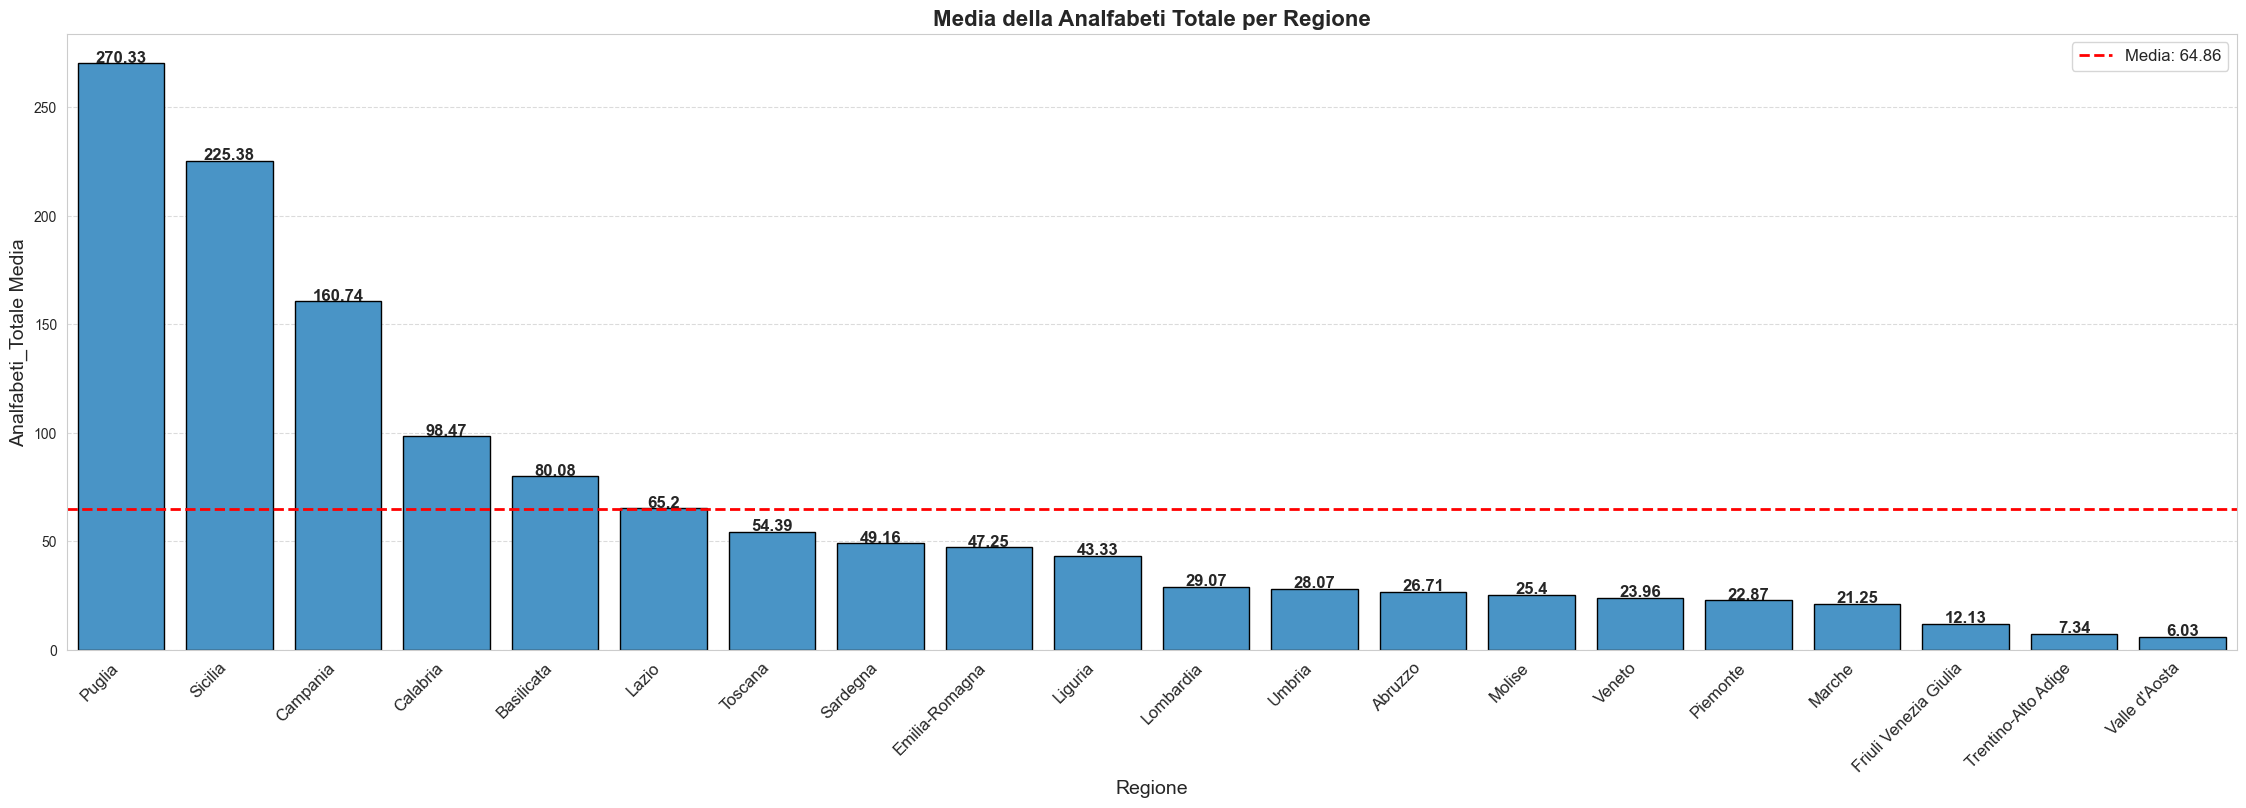

In [29]:
livelli_scolastici = ['Laurea_Totale', 'Diploma_Totale', 'Licenza Media_Totale', 'Licenza Elementare_Totale', 'Analfabeti_Totale']

for livello in livelli_scolastici:
    grafico_barre(scolarizzazione.groupby('Regione')[livello].mean().round(2).sort_values(ascending=False).reset_index(), 
                'Regione', livello, f'Media della {str(livello).replace('_', ' ')} per Regione', figsize=(28, 8), mostra_media=True)

## C'è Scuola per Tutti?

In [30]:
scolarizzazione = dfs['scolarizzazione']
scolarizzazione = scolarizzazione[['Laurea_Totale', 'Diploma_Totale', 'Licenza Media_Totale', 'Licenza Elementare_Totale', 'Alfabeti_Totale', 'Analfabeti_Totale', 'Comune']]

scolarizzazione.head()

,Laurea_Totale,Diploma_Totale,Licenza Media_Totale,Licenza Elementare_Totale,Alfabeti_Totale,Analfabeti_Totale,Comune
0,4890,10581,7561,5009,2327,593,Agrigento
1,7971,19306,18321,11240,3575,577,Alessandria
2,15122,29093,19995,15452,5424,289,Ancona
3,4298,8578,9630,5951,1943,224,Aosta
4,10800,24174,18871,13556,4693,302,Arezzo


### 📌 **Significato delle colonne**  
1. **`Laurea_Totale`**  
   - Indica il numero totale di persone che hanno conseguito una **laurea** (triennale o magistrale) o un titolo superiore (dottorato, master).  
   - Include chi ha completato gli studi universitari.  

2. **`Diploma_Totale`**  
   - Indica il numero totale di persone che hanno ottenuto un **diploma di scuola superiore** (es. liceo, istituto tecnico, istituto professionale).  
   - Non include laureati, ma solo chi si è fermato al diploma.  

3. **`Licenza Media_Totale`**  
   - Rappresenta il numero totale di persone che hanno completato la **scuola secondaria di primo grado** (ex scuola media).  
   - Non include chi ha proseguito gli studi fino al diploma o oltre.  

4. **`Licenza Elementare_Totale`**  
   - Indica il numero totale di persone che hanno completato solo la **scuola primaria** (elementari).  
   - In alcuni casi può includere persone che non hanno proseguito con la scuola media.  

In [31]:
eta = dfs['età'][['0-4_Totale', '5-9_Totale', '10-14_Totale', '15-19_Totale', '20-24_Totale', 
                  '25-29_Totale', '30-34_Totale', '35-39_Totale', '40-44_Totale', '45-49_Totale', 
                  '50-54_Totale', '55-59_Totale', '60-64_Totale', '65-69_Totale', '70-74_Totale', 
                  '>74_Totale', 'Comune']]

eta = pd.merge(eta, dfs['comunali'][['Comune', 'Provincia', 'Regione', 'Zona']], on='Comune')
eta = pd.DataFrame(eta)

eta.head()#.to_clipboard()

,0-4_Totale,5-9_Totale,10-14_Totale,15-19_Totale,20-24_Totale,25-29_Totale,30-34_Totale,35-39_Totale,40-44_Totale,45-49_Totale,50-54_Totale,55-59_Totale,60-64_Totale,65-69_Totale,70-74_Totale,>74_Totale,Comune,Provincia,Regione,Zona
0,1306,1304,1620,1933,2141,1952,1947,2140,2324,2559,2389,2140,2138,1541,1652,3428,Agrigento,Agrigento,Sicilia,Sud
1,2697,2468,2419,2594,2698,3124,3694,4660,5087,5128,4659,4193,4319,3893,4029,8516,Alessandria,Alessandria,Piemonte,Nord
2,3871,3748,3798,3863,4070,4635,5386,6502,6927,6827,6169,5944,5701,5165,5227,12161,Ancona,Ancona,Marche,Centro
3,1383,1316,1296,1322,1476,1597,1739,2168,2533,2507,2295,2097,2242,1954,2053,4317,Aosta,Aosta,Valle d'Aosta,Sconosciuto
4,3284,3183,3140,3193,3720,4220,4775,5644,5943,6050,5257,4722,5081,4308,4479,9347,Arezzo,Arezzo,Toscana,Centro


In Italia, il sistema scolastico è suddiviso in diversi livelli, ciascuno con una durata specifica e finalizzato a fornire un percorso educativo progressivo.  

### 📌 **Suddivisione dei livelli scolastici in Italia**  

| **Livello**               | **Età Tipica**  | **Descrizione** |
|---------------------------|----------------|-----------------|
| **1️⃣ Scuola dell'Infanzia** (Facoltativa) | 3-5 anni  | Non obbligatoria, prepara i bambini alla scuola primaria. |
| **2️⃣ Scuola Primaria (Elementari)** | 6-10 anni | Dura **5 anni**, introduce le basi della lettura, scrittura e matematica. |
| **3️⃣ Scuola Secondaria di Primo Grado (Medie)** | 11-13 anni | Dura **3 anni**, approfondisce materie come italiano, matematica, scienze e lingue straniere. Si conclude con l'**esame di licenza media**. |
| **4️⃣ Scuola Secondaria di Secondo Grado (Superiori)** | 14-19 anni | Dura **5 anni**, con diversi indirizzi: **licei, istituti tecnici, istituti professionali**. Si conclude con l'**esame di maturità**. |
| **5️⃣ Università (Facoltativa)** | 19+ anni | Dura **3 anni (laurea triennale)** + **2 anni (laurea magistrale)**. Opzionalmente si può proseguire con un **dottorato** o un **master**. |

### 🎓 **Tipi di scuola secondaria di secondo grado (Superiori)**
1. **Licei** (preparano all'università)  
   - Liceo Classico  
   - Liceo Scientifico  
   - Liceo Linguistico  
   - Liceo delle Scienze Umane  
   - Liceo Artistico  
   - Liceo Musicale e Coreutico  

2. **Istituti Tecnici** (preparano sia al lavoro che all'università)  
   - Settore Economico (es. Amministrazione, Finanza e Marketing)  
   - Settore Tecnologico (es. Informatica, Meccanica, Chimica)  

3. **Istituti Professionali** (formazione più pratica, orientata al mondo del lavoro)  
   - Es. Alberghiero, Meccanico, Elettronico

In [32]:
# Creazione della fascia Età 3-5 anni
eta['Età 3-5'] = eta['0-4_Totale'] * (3/6)  # Proporzione dei 3 anni su 6

# Creazione delle altre fasce di età
eta['Età 6-10'] = eta['5-9_Totale']
eta['Età 11-13'] = eta['10-14_Totale'] * (3/5)  # Proporzione dei 3 anni su 5
eta['Età 14-19'] = eta['15-19_Totale'] + eta['10-14_Totale'] * (2/5)  # Proporzione dei 2 anni su 5
eta['Età 19+'] = eta.iloc[:, 5:16].sum(axis=1)  # Somma di tutte le fasce da 20 anni in su

# Rimozione delle vecchie colonne
df_scolarizzazione = eta
df_scolarizzazione = df_scolarizzazione[['Comune', 'Provincia', 'Regione', 'Zona', 'Età 3-5', 'Età 6-10', 'Età 11-13', 'Età 14-19', 'Età 19+']]

# Merge con altre informazioni
df_scolarizzazione = df_scolarizzazione.merge(dfs['comunali'][['Comune', 'Scuole']], on='Comune') \
                        .merge(scolarizzazione[['Comune', 'Laurea_Totale', 'Diploma_Totale', 
                                                 'Licenza Media_Totale', 'Licenza Elementare_Totale']], on='Comune')

df_scolarizzazione.rename(columns={'Scuole': 'N° Scuole', 'Laurea_Totale': 'N° Laureati', 'Diploma_Totale': 'N° Diplomati', 
                                   'Licenza Media_Totale': 'N° Licenza Media', 'Licenza Elementare_Totale': 'N° Licenza Elementare'}, inplace=True)

df_scolarizzazione.head()

,Comune,Provincia,Regione,Zona,Età 3-5,Età 6-10,Età 11-13,Età 14-19,Età 19+,N° Scuole,N° Laureati,N° Diplomati,N° Licenza Media,N° Licenza Elementare
0,Agrigento,Agrigento,Sicilia,Sud,653.0,1304,972.0,2581.0,24210,95,4890,10581,7561,5009
1,Alessandria,Alessandria,Piemonte,Nord,1348.5,2468,1451.4,3561.6,51302,51,7971,19306,18321,11240
2,Ancona,Ancona,Marche,Centro,1935.5,3748,2278.8,5382.2,70644,7,15122,29093,19995,15452
3,Aosta,Aosta,Valle d'Aosta,Sconosciuto,691.5,1316,777.6,1840.4,25502,8,4298,8578,9630,5951
4,Arezzo,Arezzo,Toscana,Centro,1642.0,3183,1884.0,4449.0,59826,92,10800,24174,18871,13556


In [33]:
scuole = pd.DataFrame(dfs['scuole'][['Tipo', 'Comune']]
                      .pivot_table(index="Comune", columns="Tipo", aggfunc="size", fill_value=0))

# Reset dell'indice per trasformare "Comune" in una colonna normale
scuole.reset_index(inplace=True)

# Rinominare le colonne rimuovendo il multiindice
scuole.columns.name = None

scuole.head()

,Comune,Scuola Primaria,Scuola Secondaria di Primo Grado,Scuola Secondaria di Secondo Grado,Scuola dell'Infanzia
0,Abano Terme,6,1,7,6
1,Abbadia Lariana,1,1,0,2
2,Abbadia San Salvatore,1,1,2,1
3,Abbasanta,1,1,1,3
4,Abbateggio,0,0,0,1


In [34]:
df_scolarizzazione = pd.merge(df_scolarizzazione, scuole, on='Comune')
df_scolarizzazione.head()

,Comune,Provincia,Regione,Zona,Età 3-5,Età 6-10,Età 11-13,Età 14-19,Età 19+,N° Scuole,N° Laureati,N° Diplomati,N° Licenza Media,N° Licenza Elementare,Scuola Primaria,Scuola Secondaria di Primo Grado,Scuola Secondaria di Secondo Grado,Scuola dell'Infanzia
0,Agrigento,Agrigento,Sicilia,Sud,653.0,1304,972.0,2581.0,24210,95,4890,10581,7561,5009,26,7,22,39
1,Alessandria,Alessandria,Piemonte,Nord,1348.5,2468,1451.4,3561.6,51302,51,7971,19306,18321,11240,16,4,15,16
2,Ancona,Ancona,Marche,Centro,1935.5,3748,2278.8,5382.2,70644,7,15122,29093,19995,15452,1,0,3,3
3,Aosta,Aosta,Valle d'Aosta,Sconosciuto,691.5,1316,777.6,1840.4,25502,8,4298,8578,9630,5951,3,0,1,4
4,Arezzo,Arezzo,Toscana,Centro,1642.0,3183,1884.0,4449.0,59826,92,10800,24174,18871,13556,24,7,26,35


| Fasce di età | Formazione                  | Scuola                                      |
|--------------|-----------------------------|---------------------------------------------|
| 3-5          | Licenza Elementare           | Scuola dell'Infanzia                       |
| 6-10         | Licenza Elementare           | Scuola Primaria                            |
| 11-13        | Licenza Media                | Scuola Secondaria di Primo Grado           |
| 14-19        | Diploma                      | Scuola Secondaria di Secondo Grado         |
| 19+          | Laurea                       | Università                                 |

### Rapporto fra Fasce di Età e Tipi di Scuole

In [35]:
rapporto = df_scolarizzazione

# Calcolare le proporzioni con il controllo per la divisione per zero
rapporto["Proporzione Scuola dell'Infanzia"] = np.where(rapporto["Scuola dell'Infanzia"] != 0, 
                                                      round(rapporto['Età 3-5'] / rapporto["Scuola dell'Infanzia"], 2), 0)

rapporto["Proporzione Scuola Primaria"] = np.where(rapporto["Scuola Primaria"] != 0, 
                                                   round(rapporto['Età 6-10'] / rapporto["Scuola Primaria"], 2), 0)

rapporto["Proporzione Scuola Secondaria di Primo Grado"] = np.where(rapporto["Scuola Secondaria di Primo Grado"] != 0, 
                                                                   round(rapporto['Età 11-13'] / rapporto["Scuola Secondaria di Primo Grado"], 2), 0)

rapporto["Proporzione Scuola Secondaria di Secondo Grado"] = np.where(rapporto["Scuola Secondaria di Secondo Grado"] != 0, 
                                                                     round(rapporto['Età 14-19'] / rapporto["Scuola Secondaria di Secondo Grado"], 2), 0)

rapporto = rapporto[["Proporzione Scuola dell'Infanzia", "Proporzione Scuola Primaria", "Proporzione Scuola Secondaria di Primo Grado",
                    "Proporzione Scuola Secondaria di Secondo Grado", "Comune", "Regione", "Provincia", "Zona"]]

rapporto.head()

,Proporzione Scuola dell'Infanzia,Proporzione Scuola Primaria,Proporzione Scuola Secondaria di Primo Grado,Proporzione Scuola Secondaria di Secondo Grado,Comune,Regione,Provincia,Zona
0,16.74,50.15,138.86,117.32,Agrigento,Sicilia,Agrigento,Sud
1,84.28,154.25,362.85,237.44,Alessandria,Piemonte,Alessandria,Nord
2,645.17,3748.00,0.00,1794.07,Ancona,Marche,Ancona,Centro
3,172.88,438.67,0.00,1840.40,Aosta,Valle d'Aosta,Aosta,Sconosciuto
4,46.91,132.62,269.14,171.12,Arezzo,Toscana,Arezzo,Centro


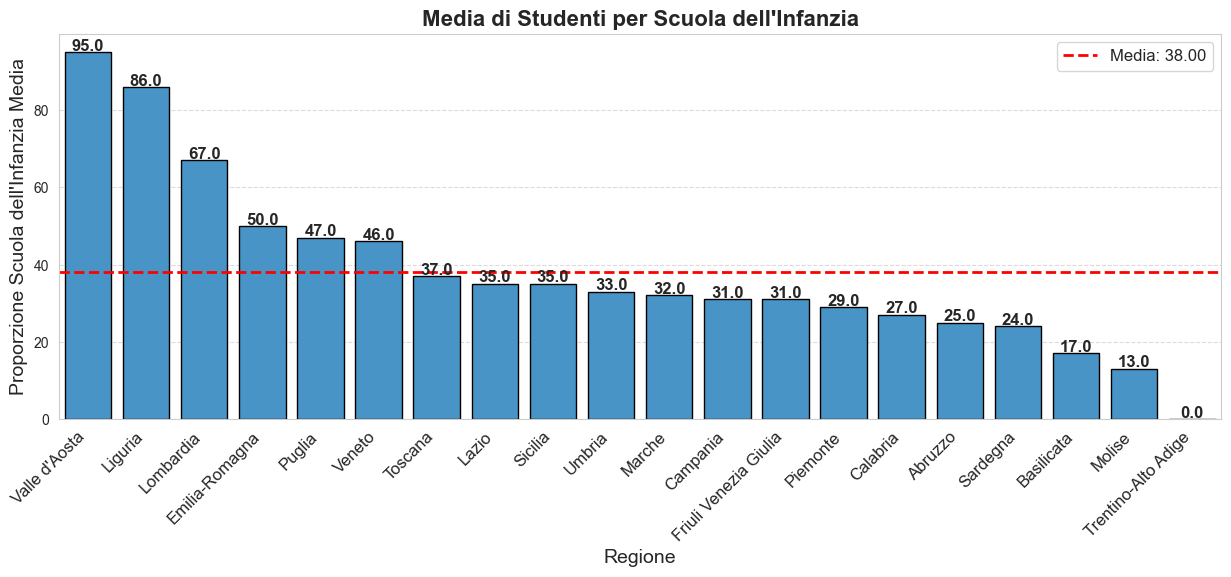

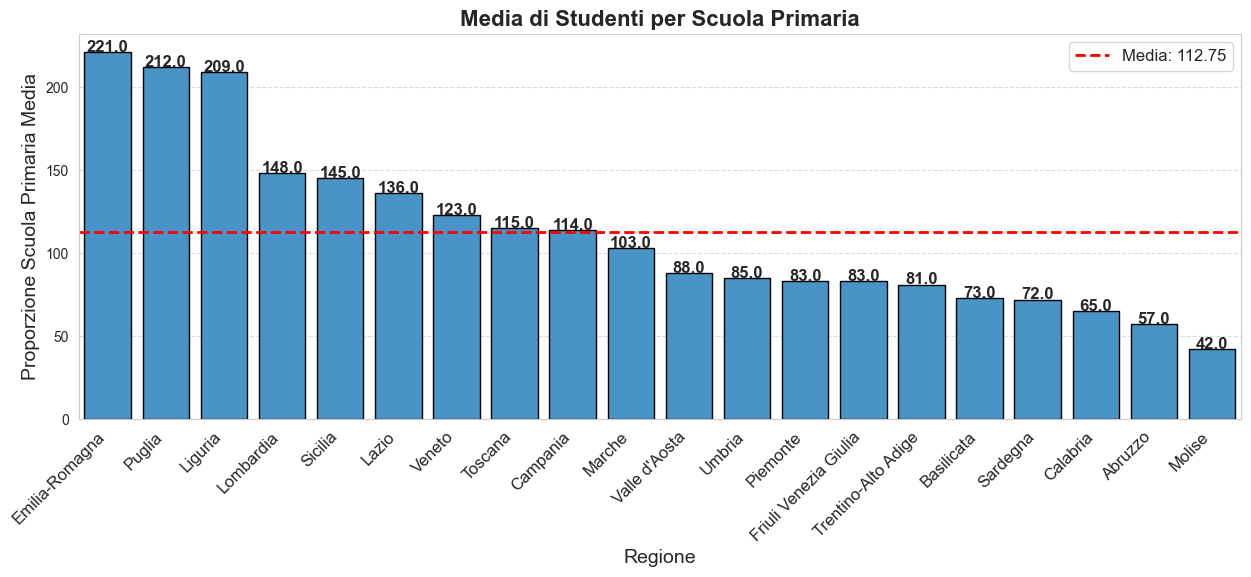

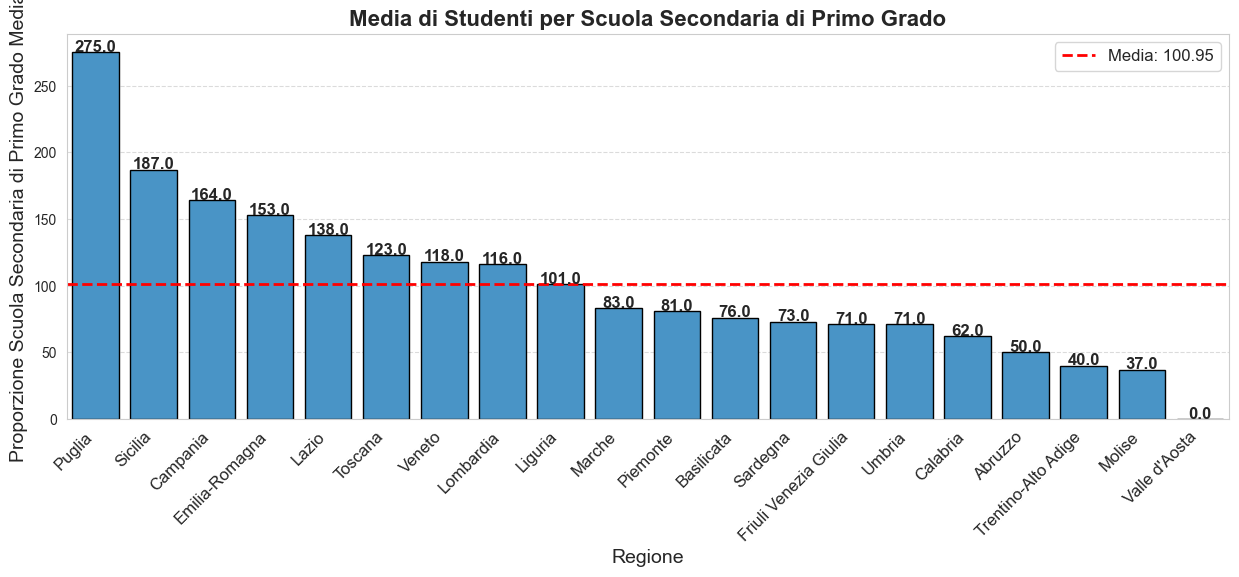

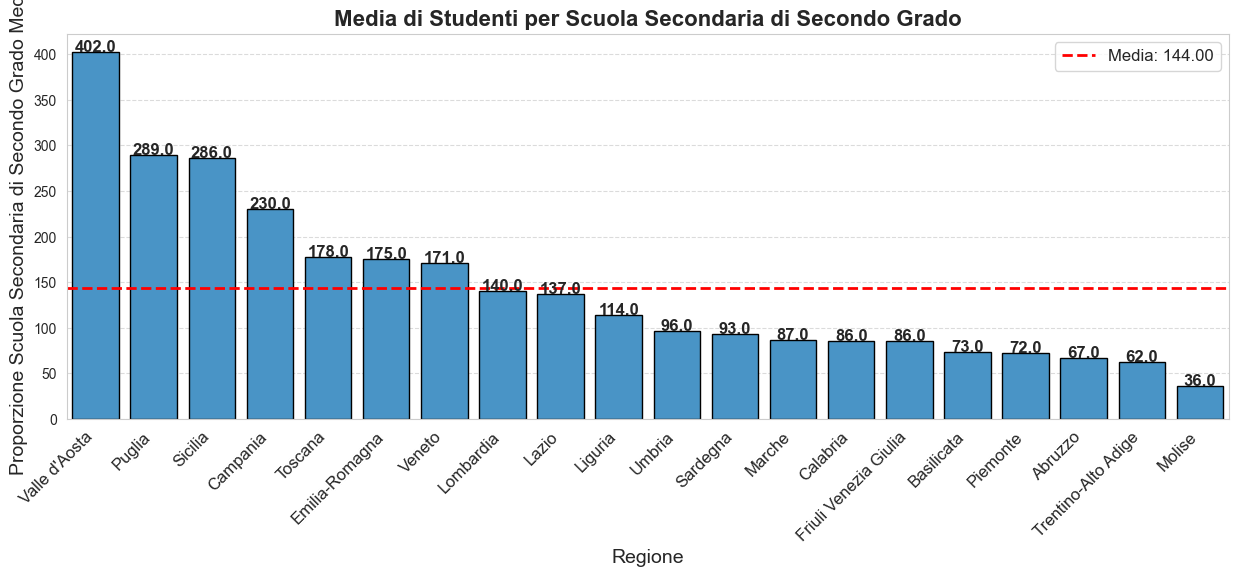

In [36]:
tipi_scuole = ["Proporzione Scuola dell'Infanzia", "Proporzione Scuola Primaria", 
               "Proporzione Scuola Secondaria di Primo Grado", "Proporzione Scuola Secondaria di Secondo Grado"]

for tipo in tipi_scuole:
    grafico_barre(pd.DataFrame(rapporto.groupby('Regione')[tipo].mean().sort_values(ascending=False).round()),
                'Regione', tipo, f'Media di Studenti per {str(tipo.replace('Proporzione ', ''))}', figsize=(15, 5), mostra_media=True)

    Valle d'Aosta
    Liguria
    Lombardia
    Emilia-Romagna
    Puglia
    Veneto
    Sicilia
    Lazio
    Campania

In [37]:
df_scolarizzazione.head()

,Comune,Provincia,Regione,Zona,Età 3-5,Età 6-10,Età 11-13,Età 14-19,Età 19+,N° Scuole,N° Laureati,N° Diplomati,N° Licenza Media,N° Licenza Elementare,Scuola Primaria,Scuola Secondaria di Primo Grado,Scuola Secondaria di Secondo Grado,Scuola dell'Infanzia,Proporzione Scuola dell'Infanzia,Proporzione Scuola Primaria,Proporzione Scuola Secondaria di Primo Grado,Proporzione Scuola Secondaria di Secondo Grado
0,Agrigento,Agrigento,Sicilia,Sud,653.0,1304,972.0,2581.0,24210,95,4890,10581,7561,5009,26,7,22,39,16.74,50.15,138.86,117.32
1,Alessandria,Alessandria,Piemonte,Nord,1348.5,2468,1451.4,3561.6,51302,51,7971,19306,18321,11240,16,4,15,16,84.28,154.25,362.85,237.44
2,Ancona,Ancona,Marche,Centro,1935.5,3748,2278.8,5382.2,70644,7,15122,29093,19995,15452,1,0,3,3,645.17,3748.00,0.00,1794.07
3,Aosta,Aosta,Valle d'Aosta,Sconosciuto,691.5,1316,777.6,1840.4,25502,8,4298,8578,9630,5951,3,0,1,4,172.88,438.67,0.00,1840.40
4,Arezzo,Arezzo,Toscana,Centro,1642.0,3183,1884.0,4449.0,59826,92,10800,24174,18871,13556,24,7,26,35,46.91,132.62,269.14,171.12


In [38]:
def rapporto(luogo, comune):
    # Dati
    # Livelli scolastici, rappresentano le categorie per l'asse X
    livelli_scolastici = [
        "Scuola dell'Infanzia",
        "Scuola Primaria",
        "Scuola Secondaria di Primo Grado",
        "Scuola Secondaria di Secondo Grado"
    ]

    livelli = ["Scuola dell'Infanzia", "Scuola Primaria", "Scuola Secondaria di Primo Grado", "Scuola Secondaria di Secondo Grado"]
    fascedi_eta = ['Età 3-5', 'Età 6-10', 'Età 11-13', 'Età 14-19']

    quantita_di_scuole = []
    quantita_di_studenti = []

    for x, y in zip(livelli, fascedi_eta):
        quantita_di_scuole.append(df_scolarizzazione[df_scolarizzazione[luogo] == comune][x].sum())
        quantita_di_studenti.append(df_scolarizzazione[df_scolarizzazione[luogo] == comune][y].sum())

    # Creazione della figura con doppio asse Y
    # Il secondo asse Y sarà utilizzato per visualizzare i dati di 'quantita_di_studenti'
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    # Aggiunta del grafico a barre per la quantità di scuole
    # Questo grafico mostra la distribuzione della quantità di scuole per livello scolastico
    fig.add_trace(
        go.Bar(
            x=livelli_scolastici,  # Asse X: livelli scolastici
            y=quantita_di_scuole,   # Asse Y: quantità di scuole
            name="Quantità di Scuole",  # Etichetta della traccia
            marker_color="#32CD32",  # Colore delle barre
            opacity=0.8  # Opacità per l'aspetto estetico
        ),
        secondary_y=False  # Questo grafico utilizza l'asse Y primario
    )

    # Aggiunta del grafico a linee per la quantità di studenti
    # Questo grafico mostra la distribuzione della quantità di studenti per livello scolastico
    fig.add_trace(
        go.Scatter(
            x=livelli_scolastici,  # Asse X: livelli scolastici
            y=quantita_di_studenti,  # Asse Y: quantità di studenti
            name="Quantità di Studenti",  # Etichetta della traccia
            mode="lines+markers",  # Mostra sia la linea che i punti
            line=dict(color="crimson", width=3),  # Colore e larghezza della linea
            marker=dict(size=8, symbol="circle", color="crimson")  # Punti della linea con colore e dimensione
        ),
        secondary_y=True  # Questo grafico utilizza l'asse Y secondario
    )

    # Titoli degli assi
    fig.update_xaxes(title_text="Livelli Scolastici")  # Titolo dell'asse X
    fig.update_yaxes(title_text="Quantità di Scuole", secondary_y=False)  # Titolo dell'asse Y primario
    fig.update_yaxes(title_text="Quantità di Studenti", secondary_y=True)  # Titolo dell'asse Y secondario

    # Layout migliorato
    fig.update_layout(
        title=f"Rapporto fra la Disponibilità di Scuole e la Quantità di Studenti | {luogo}:{comune}",  # Titolo del grafico
        plot_bgcolor="white",  # Colore di sfondo del grafico
        yaxis2=dict(range=[0, max(quantita_di_studenti) * 1.1])  # Range per l'asse Y secondario, leggermente espanso
    )

    p1, std1 = (round(df_scolarizzazione['Età 3-5'].mean() / df_scolarizzazione["Scuola dell'Infanzia"].mean()),
                round(df_scolarizzazione['Età 3-5'].std() / df_scolarizzazione["Scuola dell'Infanzia"].std()))

    p2, std2 = (round(df_scolarizzazione['Età 6-10'].mean() / df_scolarizzazione["Scuola Primaria"].mean()),
                round(df_scolarizzazione['Età 6-10'].std() / df_scolarizzazione["Scuola Primaria"].std()))

    p3, std3 = (round(df_scolarizzazione['Età 11-13'].mean() / df_scolarizzazione["Scuola Secondaria di Primo Grado"].mean()),
                round(df_scolarizzazione['Età 11-13'].std() / df_scolarizzazione["Scuola Secondaria di Primo Grado"].std()))

    p4, std4 = (round(df_scolarizzazione['Età 14-19'].mean() / df_scolarizzazione["Scuola Secondaria di Secondo Grado"].mean()),
                round(df_scolarizzazione['Età 14-19'].std() / df_scolarizzazione["Scuola Secondaria di Secondo Grado"].std()))

    proporzione = []
    proporzione_nazionale = [(p1, std1), (p2, std2), (p3, std3), (p4, std4)]

    for x, y in zip(quantita_di_studenti, quantita_di_scuole):
        if y == 0 or np.isnan(y):  # Evita divisioni per zero
            proporzione.append(0)
        else:
            proporzione.append(round(x/y, 2))

    livelli = ["Infanzia", "Primaria", "Secondaria I Grado", "Secondaria II Grado"]

    proporzioni = "".join(
        f"Proporzione {liv}: {p} / {pn} (std: {st}) - Differenza: {round(p - pn) if np.isfinite(p - pn) else 0} | Ci vogliono: {round((round(p - pn) if np.isfinite(p - pn) else 0) / pn)}\n"
        for (liv, p, (pn, st)) in zip(livelli, proporzione, proporzione_nazionale)
    )

    print(proporzioni)


    # Mostra il grafico
    fig.show()

df_scolarizzazione[['Età 3-5', 'Età 6-10', 'Età 11-13', 'Età 14-19', 
                   "Scuola dell'Infanzia", "Scuola Primaria", "Scuola Secondaria di Primo Grado", "Scuola Secondaria di Secondo Grado",
                   "Proporzione Scuola dell'Infanzia", "Proporzione Scuola Primaria", "Proporzione Scuola Secondaria di Primo Grado",
                   "Proporzione Scuola Secondaria di Secondo Grado"]].describe().round(2).transpose().drop(columns=['count', 'min', 'max']).transpose()

,Età 3-5,Età 6-10,Età 11-13,Età 14-19,Scuola dell'Infanzia,Scuola Primaria,Scuola Secondaria di Primo Grado,Scuola Secondaria di Secondo Grado,Proporzione Scuola dell'Infanzia,Proporzione Scuola Primaria,Proporzione Scuola Secondaria di Primo Grado,Proporzione Scuola Secondaria di Secondo Grado
mean,158.90,321.88,194.89,465.65,3.27,2.18,0.94,1.67,40.78,120.72,114.45,141.57
std,906.37,1805.28,1066.88,2552.47,5.03,3.30,1.00,3.89,244.97,532.52,455.51,560.85
25%,16.00,34.00,21.00,51.20,1.00,1.00,0.00,0.00,10.00,27.00,0.00,0.00
50%,43.50,89.00,54.00,128.40,2.00,1.00,1.00,0.00,23.50,68.00,45.60,0.00
75%,124.50,247.00,147.00,346.20,3.00,2.00,1.00,1.00,43.00,136.00,136.20,172.40


In [39]:
rapporto('Comune', 'Venezia')

Proporzione Infanzia: 456.0 / 49 (std: 180) - Differenza: 407 | Ci vogliono: 8
Proporzione Primaria: 478.25 / 147 (std: 548) - Differenza: 331 | Ci vogliono: 2
Proporzione Secondaria I Grado: 0 / 208 (std: 1064) - Differenza: -208 | Ci vogliono: -1
Proporzione Secondaria II Grado: 631.65 / 279 (std: 656) - Differenza: 353 | Ci vogliono: 1



In [40]:
rapporto('Zona', 'Nord')
rapporto('Zona', 'Sud')
rapporto('Zona', 'Centro')
rapporto('Zona', 'Ovest')

Proporzione Infanzia: 60.03 / 49 (std: 180) - Differenza: 11 | Ci vogliono: 0
Proporzione Primaria: 156.26 / 147 (std: 548) - Differenza: 9 | Ci vogliono: 0
Proporzione Secondaria I Grado: 209.23 / 208 (std: 1064) - Differenza: 1 | Ci vogliono: 0
Proporzione Secondaria II Grado: 311.18 / 279 (std: 656) - Differenza: 32 | Ci vogliono: 0



Proporzione Infanzia: 38.92 / 49 (std: 180) - Differenza: -10 | Ci vogliono: 0
Proporzione Primaria: 137.56 / 147 (std: 548) - Differenza: -9 | Ci vogliono: 0
Proporzione Secondaria I Grado: 213.91 / 208 (std: 1064) - Differenza: 6 | Ci vogliono: 0
Proporzione Secondaria II Grado: 268.42 / 279 (std: 656) - Differenza: -11 | Ci vogliono: 0



Proporzione Infanzia: 55.25 / 49 (std: 180) - Differenza: 6 | Ci vogliono: 0
Proporzione Primaria: 166.32 / 147 (std: 548) - Differenza: 19 | Ci vogliono: 0
Proporzione Secondaria I Grado: 224.22 / 208 (std: 1064) - Differenza: 16 | Ci vogliono: 0
Proporzione Secondaria II Grado: 265.82 / 279 (std: 656) - Differenza: -13 | Ci vogliono: 0



Proporzione Infanzia: 31.9 / 49 (std: 180) - Differenza: -17 | Ci vogliono: 0
Proporzione Primaria: 108.79 / 147 (std: 548) - Differenza: -38 | Ci vogliono: 0
Proporzione Secondaria I Grado: 116.47 / 208 (std: 1064) - Differenza: -92 | Ci vogliono: 0
Proporzione Secondaria II Grado: 202.53 / 279 (std: 656) - Differenza: -76 | Ci vogliono: 0

